In [1]:
import pandas as pd
import numpy as np
import math

pd_reader = pd.read_csv("data_8.csv",encoding="ANSI")
display(pd_reader)
df = pd_reader

,yyyymm,code,時価総額,PBR,翌1M収益率
0,200010,1301,1.563303e+10,14.687101,5.797101
1,200010,1331,2.944415e+10,NaN,8.938547
2,200010,1332,4.962064e+10,0.652309,0.000000
3,200010,1333,3.690000e+10,1.610369,13.008130
4,200010,1351,3.780000e+09,NaN,14.285714
...,...,...,...,...,...
429890,202012,9991,3.497868e+10,0.626317,-1.875000
429891,202012,9993,1.914856e+10,0.676529,0.000000
429892,202012,9994,2.360497e+10,0.738982,-0.459559
429893,202012,9995,1.189206e+10,0.481392,9.555556


In [2]:
def nextym(yyyymm):
    yyyymm = yyyymm + 1
    if yyyymm % 100 == 13:
        yyyymm = yyyymm + 88
    return yyyymm
nextym(201212)

201301

In [3]:
yyyymm = 200010
top_total = 0
bot_total = 0
top_rtn = []
bot_rtn = []

while yyyymm <= 202012:
    #print(yyyymm)
    tmp = df[df['yyyymm'] == yyyymm]
    top = tmp.loc[:, '時価総額'].quantile(q=0.9)
    bot = tmp.loc[:, '時価総額'].quantile(q=0.1)
    tmp_2 = tmp[tmp.時価総額 >= top]
    top_rtn0 = tmp_2.loc[:, '翌1M収益率'].mean()
     
    #print(top_rtn)
    tmp_2 = tmp[tmp.時価総額 <= bot]
    bot_rtn0= tmp_2.loc[:, '翌1M収益率'].mean()
    
    #print(bot_rtn)
    
    #spd = bot_rtn - top_rtn
    #print(spd)
    
    top_total = top_total + top_rtn0
    top_rtn.append(top_total)
    bot_total = bot_total + bot_rtn0
    bot_rtn.append(bot_total)
    
    yyyymm = nextym(yyyymm)
    
spd = bot_total - top_total

print(bot_total,top_total)
print(spd)

302.31307230874194 69.36084167979043
232.9522306289515


DatetimeIndex(['2000-09-30', '2000-10-31', '2000-11-30', '2000-12-31',
               '2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30',
               '2001-05-31', '2001-06-30',
               ...
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
               '2020-10-31', '2020-11-30'],
              dtype='datetime64[ns]', length=243, freq='M')
#########################################


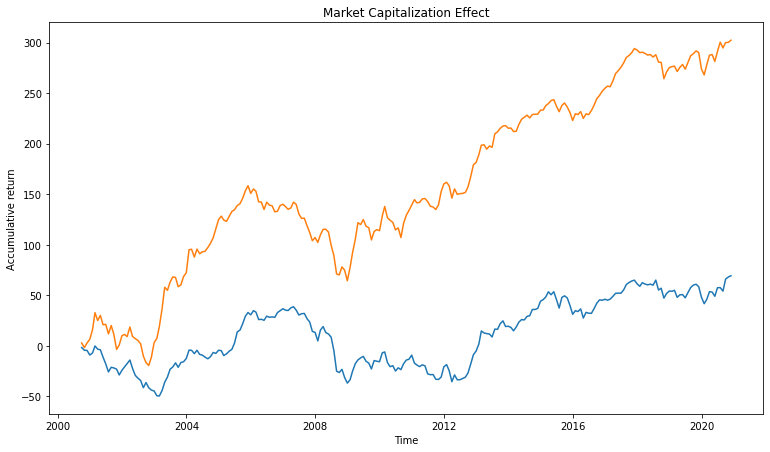

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12.8, 7.2)
x=pd.date_range('2000-09-01','2020-12-01',freq='M')
print(x)
print('#########################################')
plt.plot(x, top_rtn)
y_2 = bot_rtn
plt.plot(x, bot_rtn)
plt.xlabel("Time")
plt.ylabel("Accumulative return")
plt.title('Market Capitalization Effect')

plt.show()

In [5]:
yyyymm = 200010
top_total = 0
bot_total = 0
top_rtn = []
bot_rtn = []

while yyyymm <= 202012:
    #print(yyyymm)
    tmp = df[df['yyyymm'] == yyyymm]
    top = tmp.loc[:, 'PBR'].quantile(q=0.9)
    bot = tmp.loc[:, 'PBR'].quantile(q=0.1)
    tmp_2 = tmp[tmp.PBR >= top]
    top_rtn0 = tmp_2.loc[:, '翌1M収益率'].mean()
     
    #print(top_rtn)
    tmp_2 = tmp[tmp.PBR<= bot]
    bot_rtn0= tmp_2.loc[:, '翌1M収益率'].mean()
    
    #print(bot_rtn)
    
    #spd = bot_rtn - top_rtn
    #print(spd)
    
    top_total = top_total + top_rtn0
    top_rtn.append(top_total)
    bot_total = bot_total + bot_rtn0
    bot_rtn.append(bot_total)
    
    yyyymm = nextym(yyyymm)
    
spd = bot_total - top_total

print(bot_total,top_total)
print(spd)

281.8385044054723 25.59034377160783
256.2481606338645


DatetimeIndex(['2000-09-30', '2000-10-31', '2000-11-30', '2000-12-31',
               '2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30',
               '2001-05-31', '2001-06-30',
               ...
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
               '2020-10-31', '2020-11-30'],
              dtype='datetime64[ns]', length=243, freq='M')
#########################################


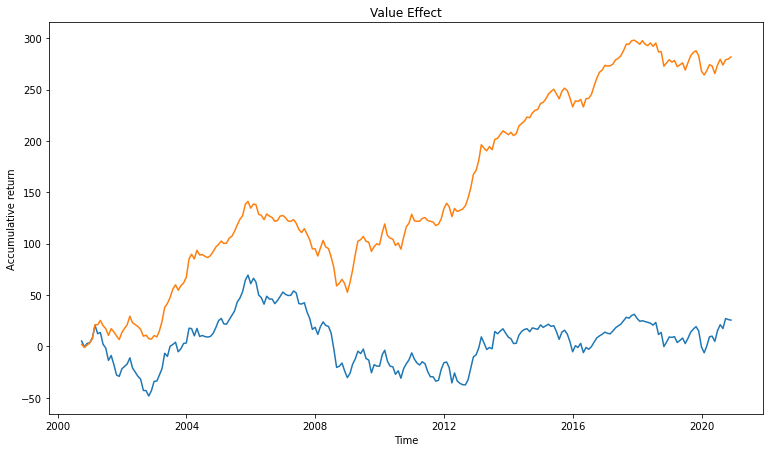

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12.8, 7.2)
x=pd.date_range('2000-09-01','2020-12-01',freq='M')
print(x)
print('#########################################')
y_1 = top_rtn
plt.plot(x, top_rtn)
y_2 = bot_rtn
plt.plot(x, bot_rtn)
plt.xlabel("Time")
plt.ylabel("Accumulative return")
plt.title('Value Effect')

plt.show()

In [7]:

yyyymm = 200010
top_total = 0
bot_total = 0
top_rtn = []
bot_rtn = []

spd = []
while yyyymm <= 202012:
    #print(yyyymm)
    tmp = df[df['yyyymm'] == yyyymm]
    top = tmp.loc[:, '時価総額'].quantile(q=0.9)
    bot = tmp.loc[:, '時価総額'].quantile(q=0.1)
    tmp_2 = tmp[tmp.時価総額 >= top]
    top_rtn0 = tmp_2.loc[:, '翌1M収益率'].mean()
    
    #print(top_rtn)
    tmp_2 = tmp[tmp.時価総額 <= bot]
    bot_rtn0= tmp_2.loc[:, '翌1M収益率'].mean()
    
    #print(bot_rtn)
    
    spd0 = bot_rtn0 - top_rtn0
    #print(spd)
    spd.append(spd0)
    yyyymm = nextym(yyyymm)
    
maximum = min(spd) 
spd = pd.DataFrame(spd)
print(spd)
print(spd.mean())
print(math.sqrt(spd.var()))
print(spd.mean()/math.sqrt(spd.var()))
result = ['平均:',spd.values.mean(), 
          '標準偏差:',math.sqrt(spd.values.var()), 
          '平均÷標準偏差:',spd.values.mean()/math.sqrt(spd.values.var()), 
          '最大損失:',maximum]
print(result)

            0
0    4.459636
1   -1.803879
2    4.702723
3    8.231193
4    7.306032
..        ...
238  9.012981
239 -2.261821
240 -6.627851
241 -1.824292
242  0.909101

[243 rows x 1 columns]
0    0.958651
dtype: float64
4.439380194449807
0    0.215943
dtype: float64
['平均:', 0.9586511548516528, '標準偏差:', 4.4302362502524275, '平均÷標準偏差:', 0.21638826931566696, '最大損失:', -13.681166912999998]


In [8]:
yyyymm = 200010
top_total = 0
bot_total = 0
top_rtn = []
bot_rtn = []

spd = []
while yyyymm <= 202012:
    #print(yyyymm)
    tmp = df[df['yyyymm'] == yyyymm]
    top = tmp.loc[:, 'PBR'].quantile(q=0.9)
    bot = tmp.loc[:, 'PBR'].quantile(q=0.1)

    tmp_2 = tmp[tmp.PBR >= top]
    top_rtn0 = tmp_2.loc[:, '翌1M収益率'].mean()
    
    tmp_2 = tmp[tmp.PBR <= bot]
    bot_rtn0= tmp_2.loc[:, '翌1M収益率'].mean()
    
    #print(bot_rtn)
    
    
    
    spd0 = bot_rtn0 - top_rtn0
    #print(spd)
    spd.append(spd0)
    yyyymm = nextym(yyyymm)
    
maximum = min(spd) 
spd = pd.DataFrame(spd)
print(spd)
print(spd.mean())
print(math.sqrt(spd.var()))
print(spd.mean()/math.sqrt(spd.var()))
result = ['平均:',spd.values.mean(), 
          '標準偏差:',math.sqrt(spd.values.var()), 
          '平均÷標準偏差:',spd.values.mean()/math.sqrt(spd.values.var()), 
          '最大損失:',maximum]
print(result)

            0
0   -3.205013
1    2.644238
2   -1.012222
3    1.260619
4   -0.652320
..        ...
238 -0.272529
239 -1.833865
240 -4.728312
241  1.921075
242  2.459422

[243 rows x 1 columns]
0    1.054519
dtype: float64
2.5607593298025253
0    0.411799
dtype: float64
['平均:', 1.054519179563228, '標準偏差:', 2.555484845665323, '平均÷標準偏差:', 0.4126493574602603, '最大損失:', -6.725523653746913]


In [9]:
yyyymm = 200010
bot_total = 0
bot_rtn = []
spd_acc = 0
mean_acc = 0
spd_monthly = []
mean_monthly = []

while yyyymm <= 202012:
    #print(yyyymm)
    tmp = df[df['yyyymm'] == yyyymm]
    top = tmp.loc[:, '時価総額'].quantile(q=0.9)
    bot = tmp.loc[:, '時価総額'].quantile(q=0.1)

    tmp_2 = tmp[tmp.時価総額 <= bot]
    bot_rtn0 = tmp_2.loc[:, '翌1M収益率'].mean()
    bot_total = bot_total + bot_rtn0
    #print(bot_rtn)
    
    tmp_total_mean = tmp['翌1M収益率'].mean()
    
    spd0 = bot_rtn0 - tmp_total_mean
    
    spd_acc = spd_acc + spd0
    spd_monthly.append(spd_acc)

    
    yyyymm = nextym(yyyymm)
    
print(spd_acc)

144.04888676828202


DatetimeIndex(['2000-09-30', '2000-10-31', '2000-11-30', '2000-12-31',
               '2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30',
               '2001-05-31', '2001-06-30',
               ...
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
               '2020-10-31', '2020-11-30'],
              dtype='datetime64[ns]', length=243, freq='M')
#########################################


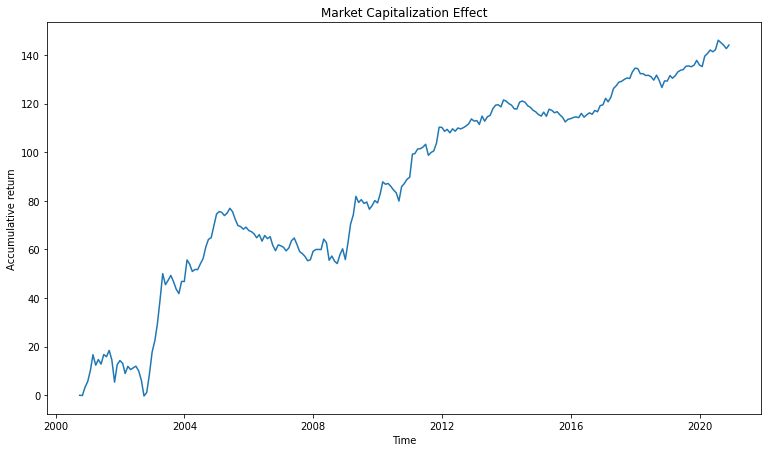

In [10]:
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize']=(12.8, 7.2) 
x=pd.date_range('2000-09-01','2020-12-01',freq='M') 
print(x) 
print('#########################################') 

y_1 = spd_monthly 

plt.plot(x, y_1) 

plt.xlabel("Time") 
plt.ylabel("Accumulative return") 
plt.title('Market Capitalization Effect')

plt.show()